In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16

import datetime
import matplotlib.dates as mdates
from datetime import datetime, timedelta

### Defining some useful functions

These functions were written after most of the code had been written, to neaten out the work and make the code easier to read

In [2]:
def polyfitline(x, y, deg):
    summed = np.zeros(len(x))
    for i in np.arange(0, deg+1, 1):
        #print(i)
        ith_sum = np.polyfit(x, y, deg)[i] * x ** (deg - i)
        summed = summed + ith_sum
    return summed
    #print(summed)
    #plt.plot(x, summed)

### Loading Covid-19 case data

Data for confirmed positive cases of Covid-19 per day from 1st January 2021 to 31st October 2021 are imported and plotted 

In [3]:
covid_cases = pd.read_csv('covidtesting.csv')

#print(covid_cases.columns)

dates = covid_cases[['Reported Date', 'Confirmed Positive'] ] [330:634 + 15] #Data from 1st Jan 2021 to 31st Oct 2021
                                                                             # +15 to apply boxcar window 
#print(np.shape(dates))
dates_array = np.array(dates['Reported Date'], dtype = np.datetime64)


cases = np.array(dates['Confirmed Positive'])

cases[len(cases) + 1 -14 : len(cases) + 1] = 0 #boxcar windowing beyond 31st Oct




# plt.plot(dates_array, retrend)
# plt.title('Covid cases per day (filtered for high frequency noise)')
# plt.xlabel("Dates")
# plt.ylabel("Confirmed positive covid cases reported")
# plt.show()




### Filtering Covid-19 Case Data
The confirmed positive cases of Covid-19 per day from 1st January 2021 to 31st October 2021 data is filtered in the frequency domain to remove high frequency noise. The intermediate plots have been commented out by default. The final plots comparing filtered and unfiltered data for positive covid-19 cases is in the cell below. The filtering was done by techniques used in lab 3: applying a boxcar window to the data, fourier transforming to frequency domain and filtering out high frequency noise, then inverse fourier transforming the data back.

In [4]:
delta = 1 #Sampling rate; here our data is per day
days = np.arange(0, len(dates_array), delta)


fitline = polyfitline(days, cases, 7)

detrend = cases - fitline

# plt.figure()
# plt.plot(days, detrend) #Uncomment to see detrended data

detrend_fft = np.fft.fftshift(np.fft.fft(detrend))
f_axis_detrend = np.fft.fftshift(np.fft.fftfreq(len(detrend), 1/86400)) #Sample rate is per day i.e. per 86400s

# plt.figure()
# plt.plot(f_axis_detrend, detrend_fft) 
# plt.xlabel('Frequency (Hz)')
# plt.title('Detrended data in frequency domain')


for i in range(0, len(f_axis_detrend)): #Removing high frequency noise; cutoff determined from above f-domain graph
    if f_axis_detrend[i] < -6000 or f_axis_detrend[i] > 6000 : 
        detrend_fft[i] = 0                                      

     
        
# plt.figure()
# plt.plot(f_axis_detrend, detrend_fft)
# plt.xlabel('Frequency (Hz)')
# plt.title('Filtered detrended data in frequency domain')

detrend_ifft = np.fft.ifft(np.fft.ifftshift(detrend_fft))

retrend = detrend_ifft + fitline

# plt.figure()
# plt.plot(dates_array, retrend)
# plt.title('Covid cases per day (filtered for high frequency noise)')
# plt.xlabel("Dates")
# plt.ylabel("Confirmed positive covid cases reported")
# plt.show()
#plt.scatter(days, caes, label = 'original')

### Positive covid data plots

The filtered and unfiltered data of confirmed Covid-19 cases per day is plotted. As we are only analysing data upto 31st October 2021, the ends of the data (that were set to 0 by the boxcar windowing) are no longer plotted

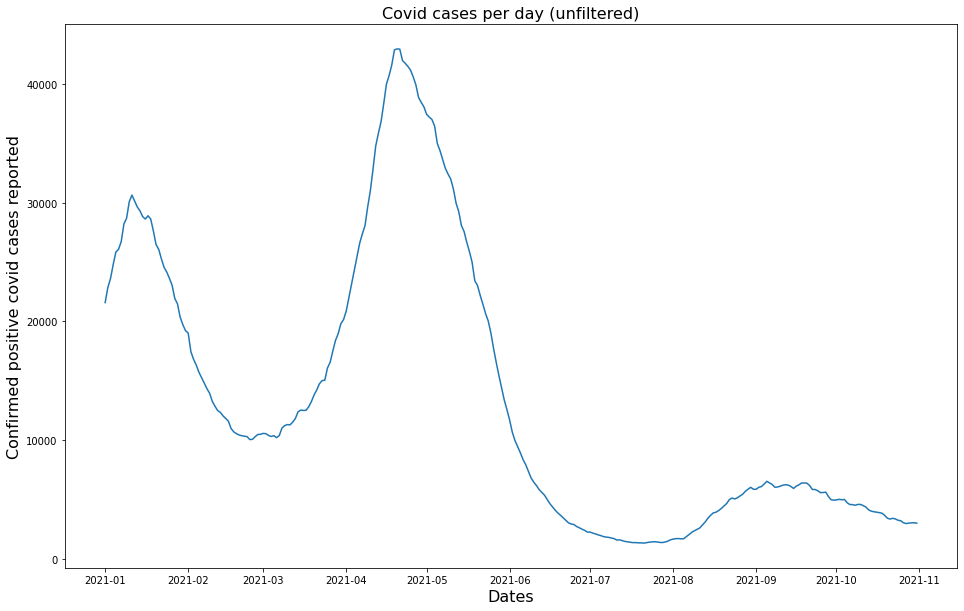

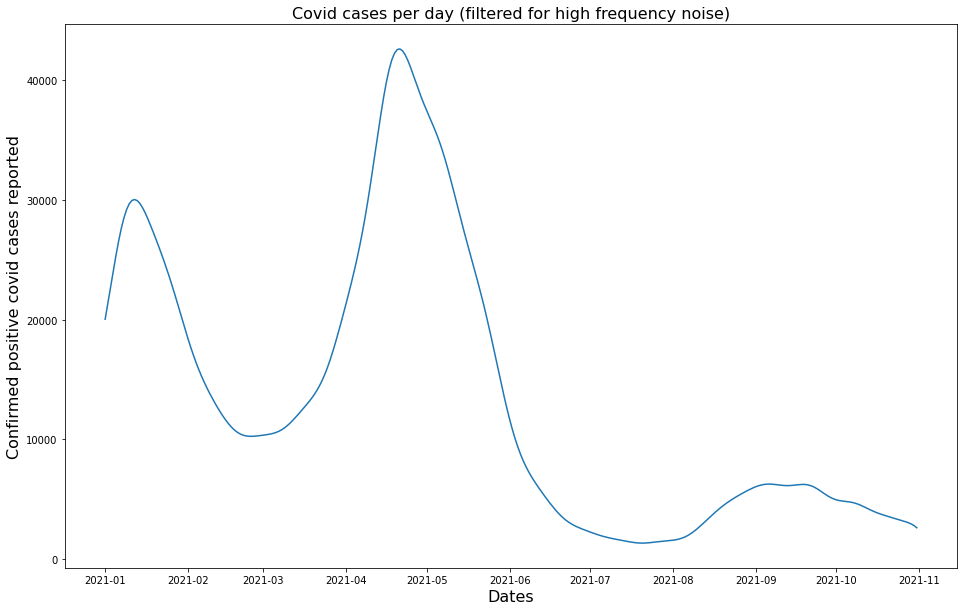

In [5]:
plot_dates = dates_array[0 : len(dates_array) - 15]
unfiltered_cases = cases[0 : len(cases) - 15]
filtered_cases = np.real(retrend[0 : len(retrend) - 15])

plt.figure()
plt.plot(plot_dates, unfiltered_cases)
plt.xlabel("Dates")
plt.ylabel("Confirmed positive covid cases reported")
plt.title('Covid cases per day (unfiltered)')
plt.show()

plt.figure()
plt.plot(plot_dates, filtered_cases)
plt.title('Covid cases per day (filtered for high frequency noise)')
plt.xlabel("Dates")
plt.ylabel("Confirmed positive covid cases reported")
plt.show()

### Loading hospitilization data

Data for hospitilizations (including number of people in intensive care unit, and people on ventillators in the
intensive care unit) per day from 1st January 2021 to 31st October 2021 are imported and plotted 

In [6]:
icu_data = pd.read_csv('region_hospital_icu_covid_data.csv')
icu_data_restricted = icu_data[273:577 + 15 ] #Data from 1st Jan 2021 to 31st Oct 2021 + 15 for boxcar window

icu_dates = icu_data_restricted['date']
icu_dates_array = np.array(icu_dates, dtype = np.datetime64)

icu_current_covid = np.array(icu_data_restricted['icu_current_covid'])
icu_current_covid[len(icu_current_covid)- 14 + 1 : len(icu_current_covid) + 1 ] = 0 #boxcar windowing beyond 31st Oct

icu_current_covid_vent = np.array(icu_data_restricted['icu_current_covid_vented'])
icu_current_covid_vent[len(icu_current_covid_vent) -14 + 1 : len(icu_current_covid_vent) + 1] = 0 #boxcar windowing beyond 31st Oct 


icu_current_hospitilizations = np.array(icu_data_restricted['hospitalizations'])
icu_current_hospitilizations[len(icu_current_hospitilizations) - 14 + 1 : len(icu_current_hospitilizations) + 1 ]=0


#plt.figure()
# plt.plot(icu_dates_array, icu_current_covid, label = 'Current Covid ICU')
# plt.plot(icu_dates_array, icu_current_covid_vent, label = 'Current Covid ICU ventillator')
# plt.plot(icu_dates_array, icu_current_hospitilizations, label = 'Current hospitilizations')
# plt.legend()
# plt.xlabel('Dates')
# plt.title('Hospitilization data (Unfiltered)')
# plt.show()

### Filtering hospitilization Data
Data for hospitilizations (including number of people in intensive care unit, and people on ventillators in the
intensive care unit) per day from 1st January 2021 to 31st October 2021 is filtered in the frequency domain to remove high frequency noise. The intermediate plots have been commented out by default. The final plots comparing filtered and unfiltered data for positive covid-19 cases is in the cell below. The filtering was done by techniques used in lab 3: applying a boxcar window to the data, fourier transforming to frequency domain and filtering out high frequency noise, then inverse fourier transforming the data back.

In [7]:
fit_line_current_covid = polyfitline(days, icu_current_covid, 7)

detrend_current_covid = icu_current_covid - fit_line_current_covid

detrend_current_covid_fft = np.fft.fftshift(np.fft.fft(detrend_current_covid))
f_axis_detrend = f_axis_detrend #Same sampling rate, same time period so same frequency axis as before

# plt.figure()
# plt.plot(f_axis_detrend, detrend_current_covid_fft)
# plt.xlabel('Frequency (Hz)')

for i in range(0, len(f_axis_detrend)): #Removing high frequency noise; cutoff determined from above f-domain graph
    if f_axis_detrend[i] < -5000 or f_axis_detrend[i] > 5000 : 
        detrend_current_covid_fft[i] = 0
        
# plt.figure()
# plt.plot(f_axis_detrend, detrend_current_covid_fft)
# plt.xlabel('Frequency (Hz)')

detrend_current_covid_ifft = np.fft.ifft(np.fft.ifftshift(detrend_current_covid_fft))

retrend_current_covid = detrend_current_covid_ifft + fit_line_current_covid

# plt.figure()
# plt.plot(dates_array, retrend_current_covid)
# plt.plot(dates_array, icu_current_covid)



fit_line_current_vent = polyfitline(days, icu_current_covid_vent, 7)


detrend_current_vent = icu_current_covid_vent - fit_line_current_vent


detrend_current_vent_fft = np.fft.fftshift(np.fft.fft(detrend_current_vent))
f_axis_detrend = f_axis_detrend #Same sampling rate, same time period so same frequency axis as before

# plt.figure()
# plt.plot(f_axis_detrend, detrend_current_vent_fft)
# plt.xlabel('Frequency (Hz)')

for i in range(0, len(f_axis_detrend)): #Removing high frequency noise; cutoff determined from above f-domain graph
    if f_axis_detrend[i] < -4000 or f_axis_detrend[i] > 4000 : 
        detrend_current_vent_fft[i] = 0
        
# plt.figure()
# plt.plot(f_axis_detrend, detrend_current_vent_fft)
# plt.xlabel('Frequency (Hz)')

detrend_current_vent_ifft = np.fft.ifft(np.fft.ifftshift(detrend_current_vent_fft))

retrend_current_vent = detrend_current_vent_ifft + fit_line_current_vent





fit_line_hosp = polyfitline(days, icu_current_hospitilizations, 7)
detrend_current_hosp = icu_current_hospitilizations - fit_line_hosp

detrend_current_hosp_fft = np.fft.fftshift(np.fft.fft(detrend_current_hosp))
f_axis_detrend = f_axis_detrend #Same sampling rate, same time period so same frequency axis as before

# plt.figure()
# plt.plot(f_axis_detrend, detrend_current_hosp_fft)
# plt.xlabel('Frequency (Hz)')

for i in range(0, len(f_axis_detrend)): #Removing high frequency noise; cutoff determined from above f-domain graph
    if f_axis_detrend[i] < -5000 or f_axis_detrend[i] > 5000 : 
        detrend_current_hosp_fft[i] = 0
        
# plt.figure()
# plt.plot(f_axis_detrend, detrend_current_hosp_fft)
# plt.xlabel('Frequency (Hz)')

detrend_current_hosp_ifft = np.fft.ifft(np.fft.ifftshift(detrend_current_hosp_fft))

retrend_current_hosp = detrend_current_hosp_ifft + fit_line_hosp

# plt.figure()
# plt.plot(dates_array, retrend_current_hosp)
# plt.plot(dates_array, icu_current_hospitilizations)




### Plotting hospitilization data

The filtered and unfiltered daily hospitilization data per day is plotted. As we are only analysing data upto 31st October 2021, the ends of the data (that were set to 0 by the boxcar windowing) are no longer plotted.


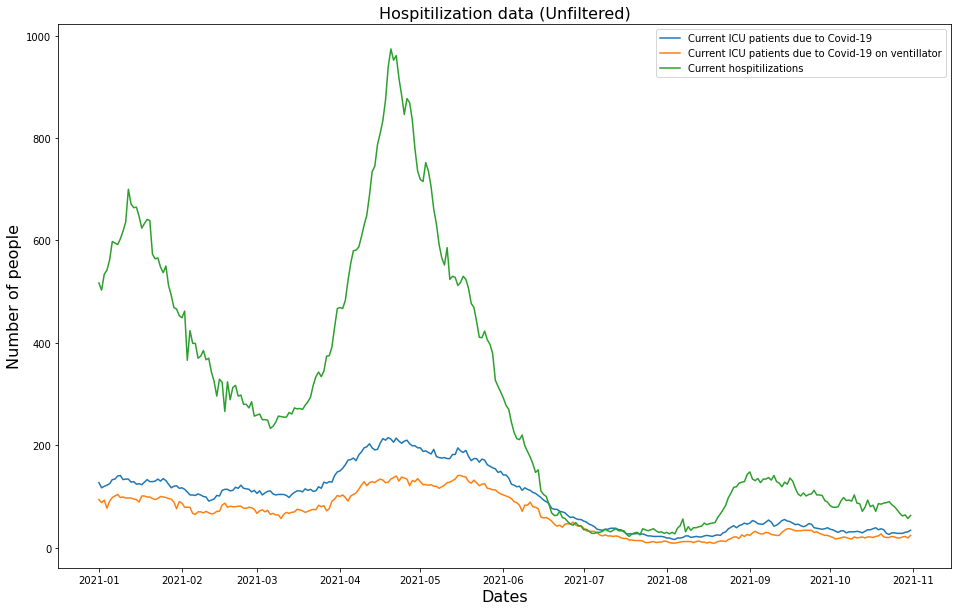

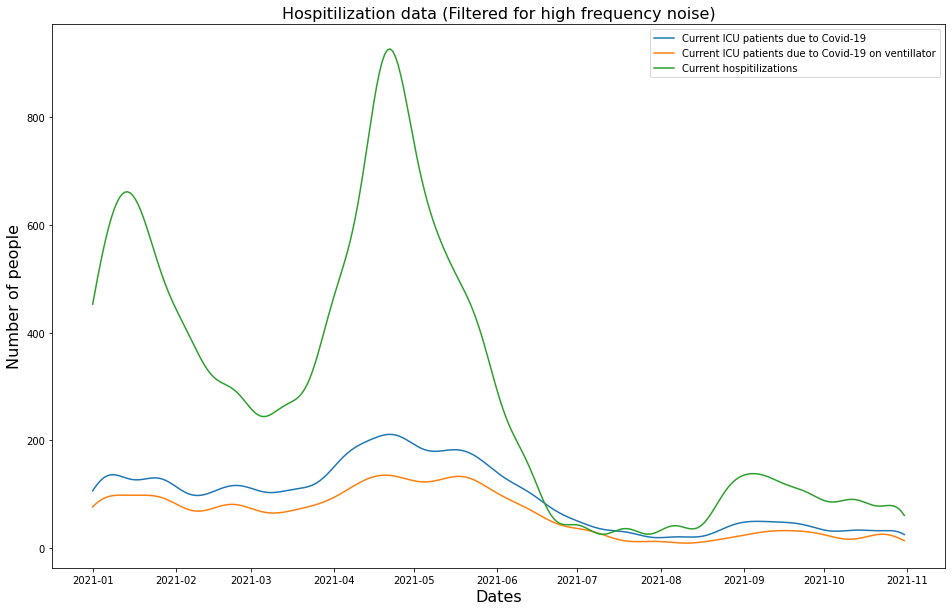

In [8]:
current_icu_unfiltered = icu_current_covid[0 : len(icu_current_covid) -15 ]
current_icu_filtered = np.real(retrend_current_covid[0 : len(retrend_current_covid) - 15])

current_vent_unfiltered = icu_current_covid_vent[0 : len(icu_current_covid_vent) - 15]
current_vent_filtered = np.real(retrend_current_vent[0 : len(retrend_current_vent) -15 ])

current_hosp_unfiltered = icu_current_hospitilizations[0 : len(icu_current_hospitilizations) -15]
current_hosp_filtered = np.real(retrend_current_hosp[0 : len(retrend_current_hosp) - 15])


plt.plot(plot_dates, current_icu_unfiltered, label = 'Current ICU patients due to Covid-19')
plt.plot(plot_dates, current_vent_unfiltered, label = 'Current ICU patients due to Covid-19 on ventillator')
plt.plot(plot_dates, current_hosp_unfiltered, label = 'Current hospitilizations')
plt.legend()
plt.xlabel('Dates')
plt.ylabel('Number of people')
plt.title('Hospitilization data (Unfiltered)')
plt.show()

plt.plot(plot_dates, current_icu_filtered, label = 'Current ICU patients due to Covid-19')
plt.plot(plot_dates, current_vent_filtered, label = 'Current ICU patients due to Covid-19 on ventillator')
plt.plot(plot_dates, current_hosp_filtered, label = 'Current hospitilizations')
plt.legend()
plt.xlabel('Dates')
plt.ylabel('Number of people')
plt.title('Hospitilization data (Filtered for high frequency noise)')
plt.show()

In [9]:
# plt.plot(plot_dates, current_icu_filtered/np.linalg.norm(current_icu_filtered), label = 'Current ICU patients due to Covid-19')
# plt.plot(plot_dates, current_vent_filtered / np.linalg.norm(current_vent_unfiltered), label = 'Current ICU patients due to Covid-19 on ventillator')
# plt.plot(plot_dates, current_hosp_filtered / np.linalg.norm(current_hosp_filtered), label = 'Current hospitilizations')
# plt.legend()
# plt.xlabel('Dates')
# plt.ylabel('Number of people')
# plt.title('Hospitilization data (Filtered for high frequency noise)')
# plt.show()




### Loading Vaccination data

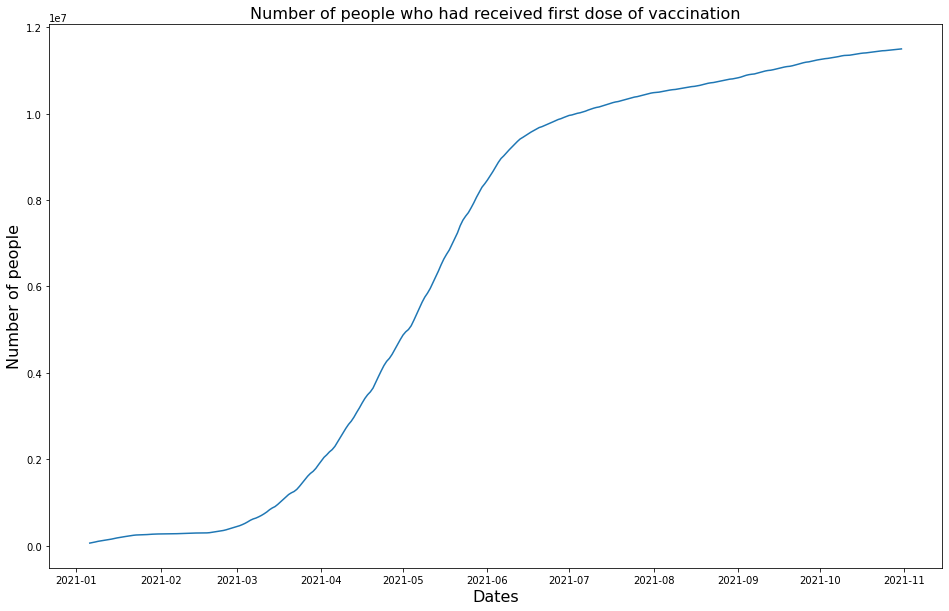

In [10]:
vaccine_data = pd.read_csv('vaccine_doses.csv')

vaccine_data_restricted = vaccine_data[['report_date', 'total_individuals_at_least_one']][3: 307] #Data from 1st Jan 2021 to 31st Oct 2021

vaccine_dates = vaccine_data_restricted['report_date']

vaccine_dates_array = np.array(vaccine_dates, dtype = np.datetime64)

first_vaccine_doses = vaccine_data_restricted['total_individuals_at_least_one']

plt.plot(plot_dates, first_vaccine_doses)
plt.xlabel('Dates')
plt.ylabel('Number of people')
plt.title('Number of people who had received first dose of vaccination')
plt.show()


### Shifting vaccination data

According to our data, the first dose was administered on January 6th 2021. Our data begins from January 1st 2021, i.e. the first dosage is at the 7th data point. Hence, for the first 7 + 14 data points, noone had received the vaccine for at least 14 days

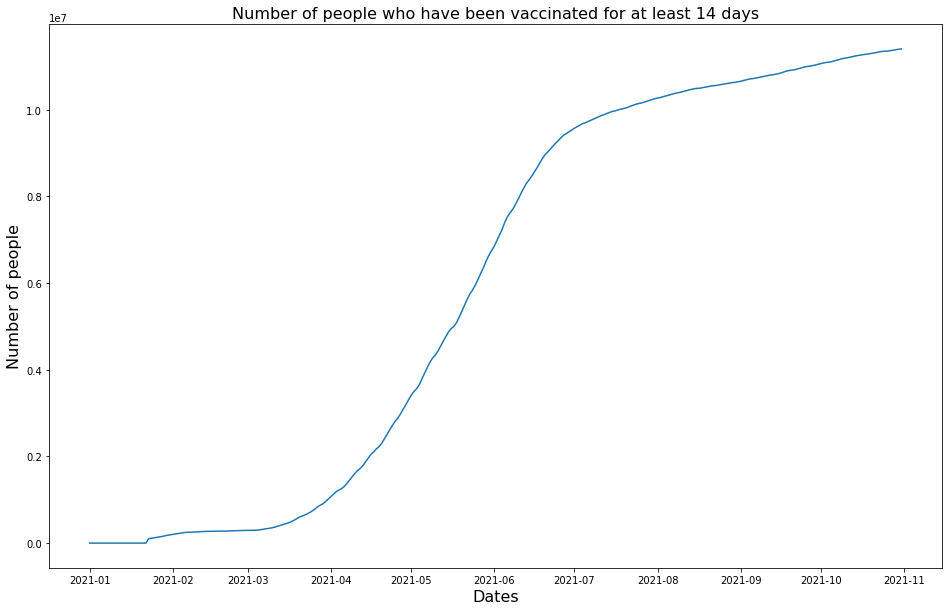

In [11]:
shifted_vaccine = np.roll(first_vaccine_doses, 14)
shifted_vaccine[0: 7 + 14 + 1] = 0 #+1 to account for endpoint
plt.figure()
plt.plot(plot_dates, shifted_vaccine)
plt.xlabel('Dates')
plt.ylabel('Number of people')
plt.title('Number of people who have been vaccinated for at least 14 days')
plt.show()
#plt.plot(dates_array, first_vaccine_doses)

### Cross correlation

As a test, I compute the cross correlation between positive covid-19 cases and hospitilization data. From the graphs, the correlation between the two is already clear

Text(0.5, 1.0, 'Cross correlataion between number of people in hospitilized and number of people vaccinated for at least 14 days ')

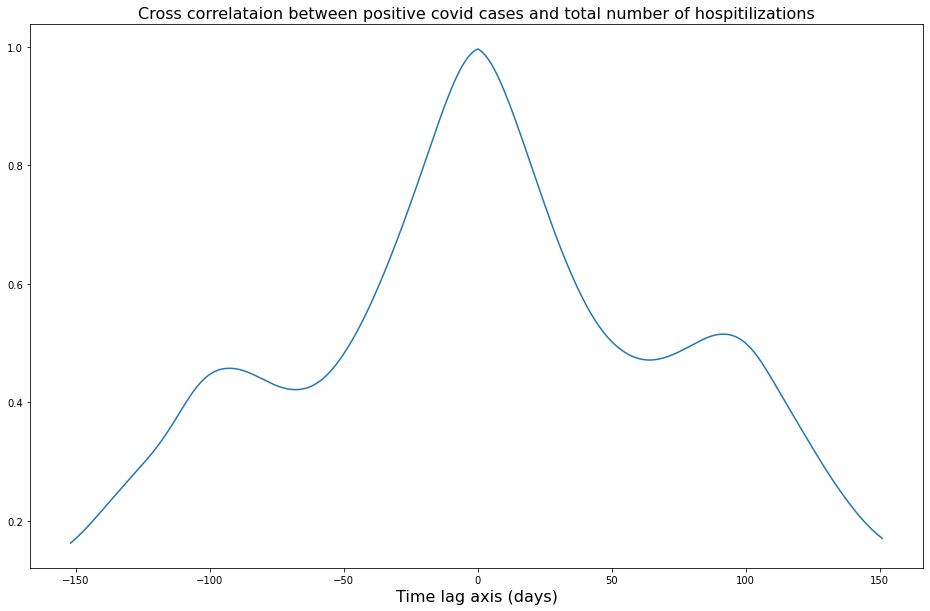

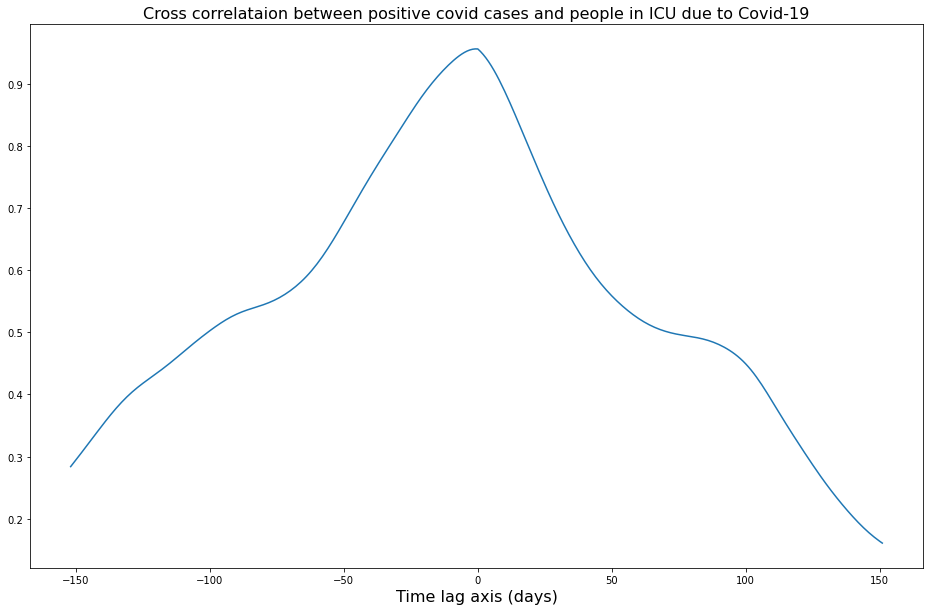

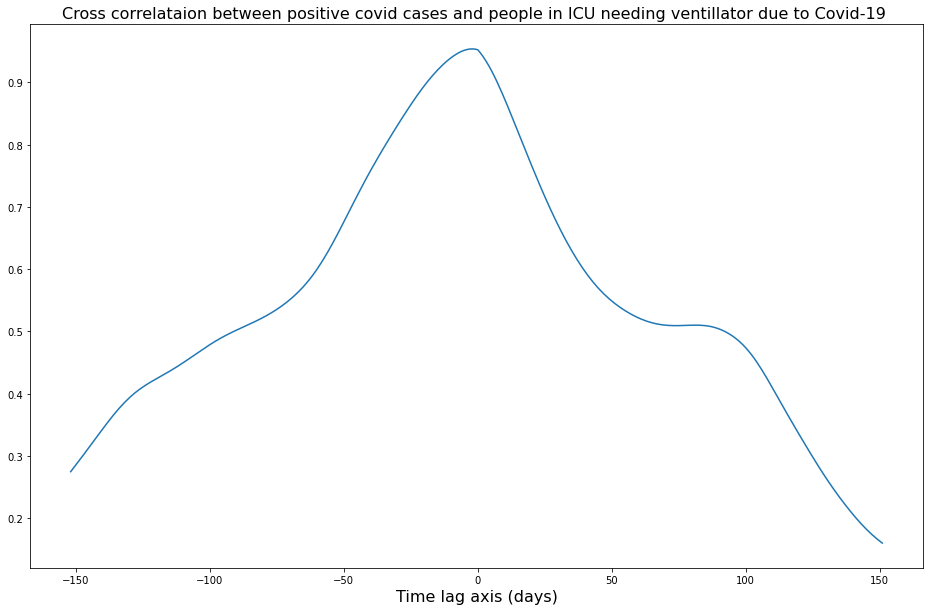

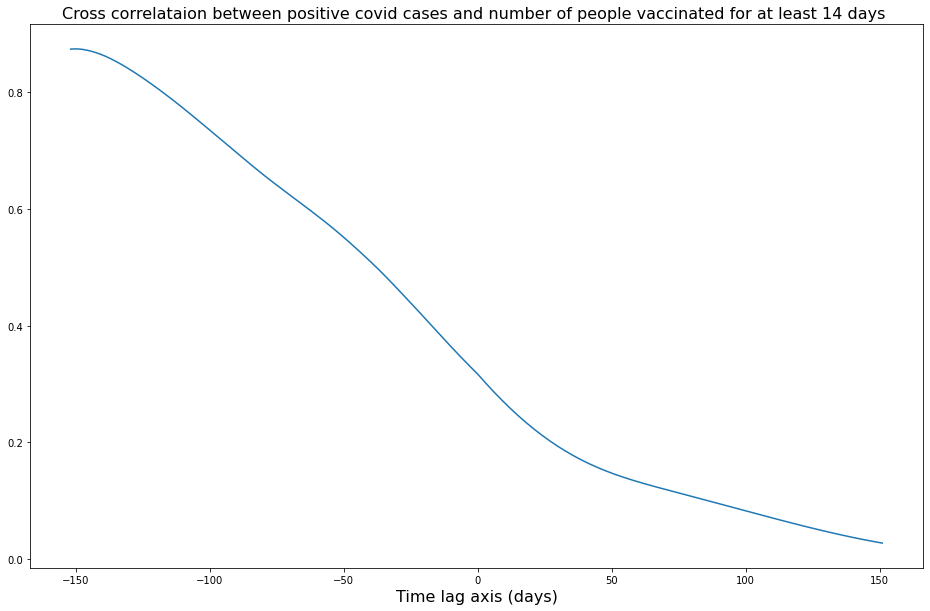

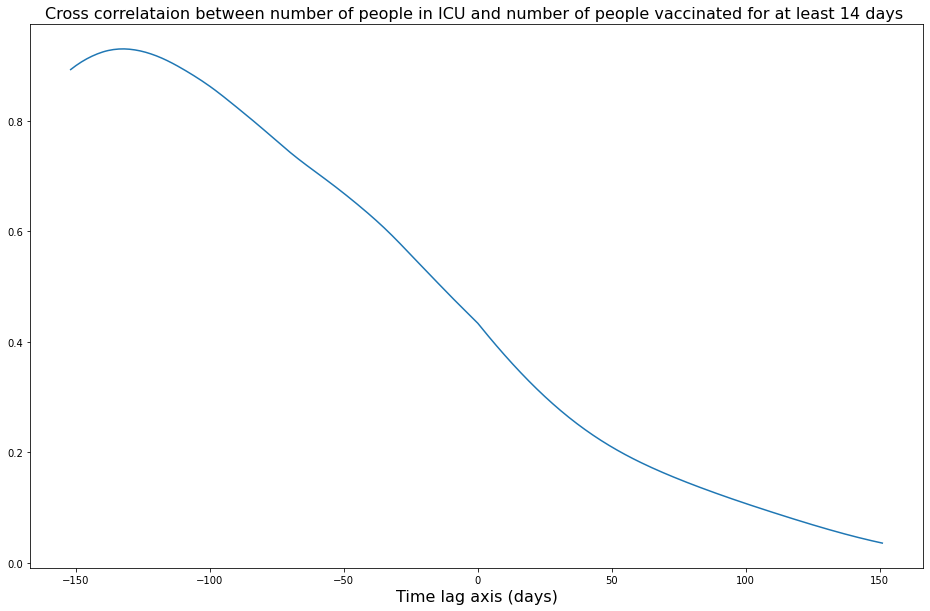

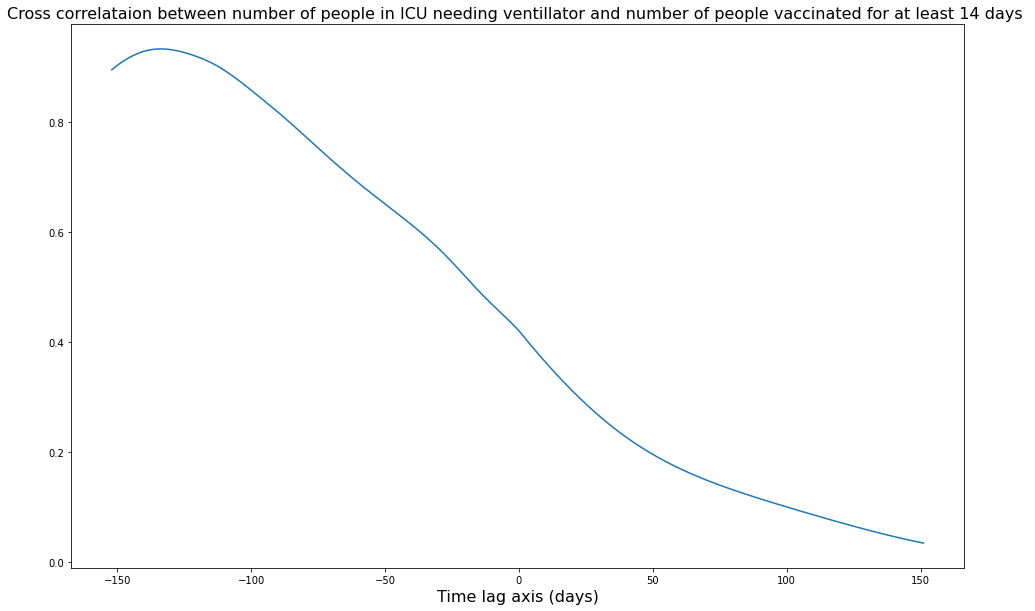

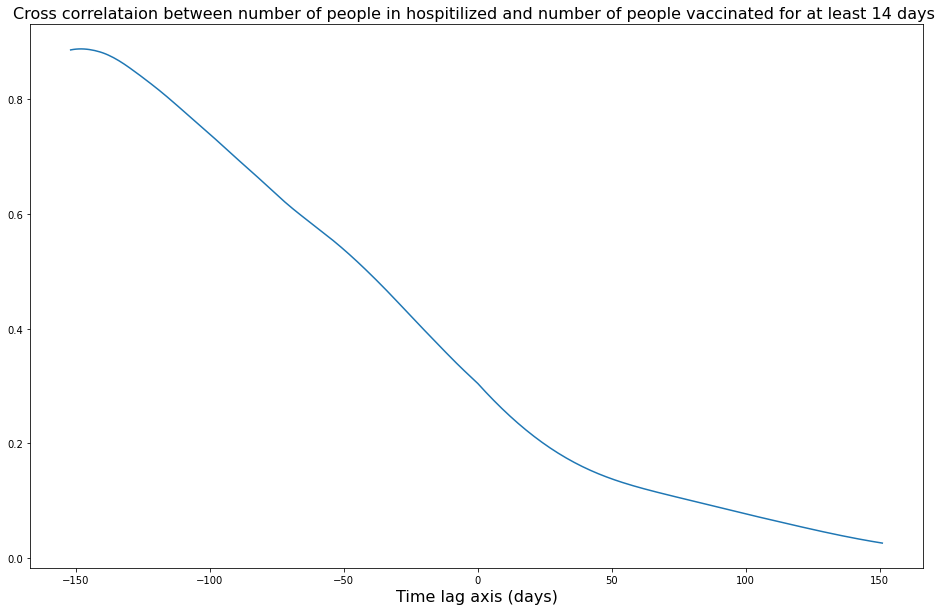

In [12]:
normed_cases = filtered_cases / np.linalg.norm(filtered_cases)
normed_icu = current_icu_filtered / np.linalg.norm(current_icu_filtered)
normed_vent = current_vent_filtered / np.linalg.norm(current_vent_filtered)
normed_hosp = current_hosp_filtered / np.linalg.norm(current_hosp_filtered)
normed_vacc = shifted_vaccine / np.linalg.norm(shifted_vaccine)


days_plot = np.arange(0, len(plot_dates), 1)

tau = np.arange(-len(days_plot)/2 , len(days_plot)/2 , delta) 


positive_covid_hosp_correlate = np.correlate(normed_cases, normed_hosp, mode = 'same')

plt.figure()
plt.plot(tau, positive_covid_hosp_correlate)
plt.xlabel('Time lag axis (days)')
plt.title('Cross correlataion between positive covid cases and total number of hospitilizations')

positive_covid_icu_correlate = np.correlate(normed_cases, normed_icu, mode = 'same')

plt.figure()
plt.plot(tau, positive_covid_icu_correlate)
plt.xlabel('Time lag axis (days)')
plt.title('Cross correlataion between positive covid cases and people in ICU due to Covid-19')

positive_covid_vent_correlate = np. correlate(normed_cases, normed_vent, mode = 'same')

plt.figure()
plt.plot(tau, positive_covid_vent_correlate)
plt.xlabel('Time lag axis (days)')
plt.title('Cross correlataion between positive covid cases and people in ICU needing ventillator due to Covid-19 ')

positive_covid_vaccine_correlate = np.correlate(normed_cases, normed_vacc, mode = 'same')

plt.figure()
plt.plot(tau, positive_covid_vaccine_correlate)
plt.xlabel('Time lag axis (days)')
plt.title('Cross correlataion between positive covid cases and number of people vaccinated for at least 14 days ')

icu_vaccine_correlate = np.correlate(normed_icu, normed_vacc, mode = 'same')

plt.figure()
plt.plot(tau, icu_vaccine_correlate)
plt.xlabel('Time lag axis (days)')
plt.title('Cross correlataion between number of people in ICU and number of people vaccinated for at least 14 days ')


vent_vaccine_correlate = np.correlate(normed_vent, normed_vacc, mode = 'same')


plt.figure()
plt.plot(tau, vent_vaccine_correlate)
plt.xlabel('Time lag axis (days)')
plt.title('Cross correlataion between number of people in ICU needing ventillator and number of people vaccinated for at least 14 days ')


hosp_vaccine_correlate = np.correlate(normed_hosp, normed_vacc, mode = 'same')

plt.figure()
plt.plot(tau, hosp_vaccine_correlate)
plt.xlabel('Time lag axis (days)')
plt.title('Cross correlataion between number of people in hospitilized and number of people vaccinated for at least 14 days ')

### Comparing normalized data to vaccine graphs and observing trends

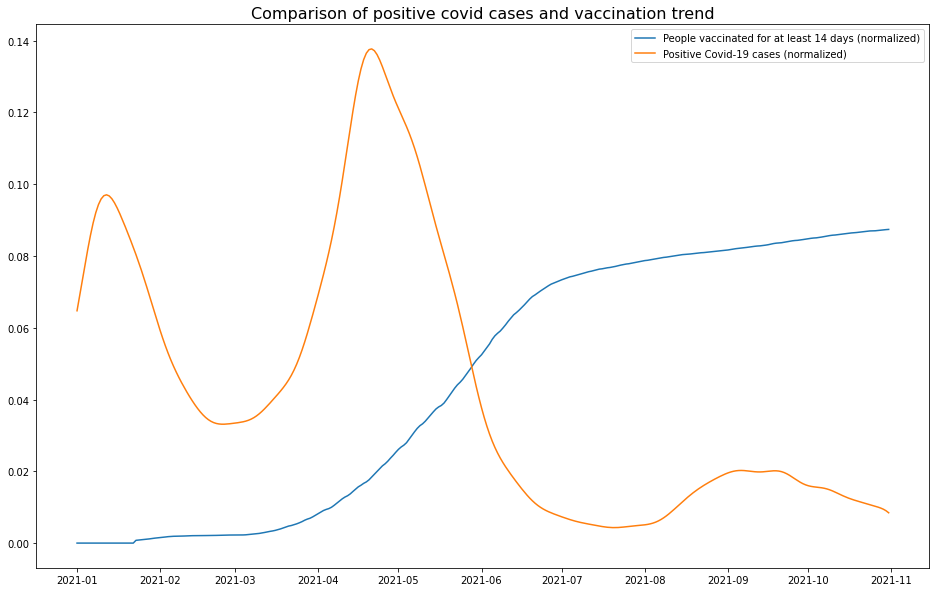

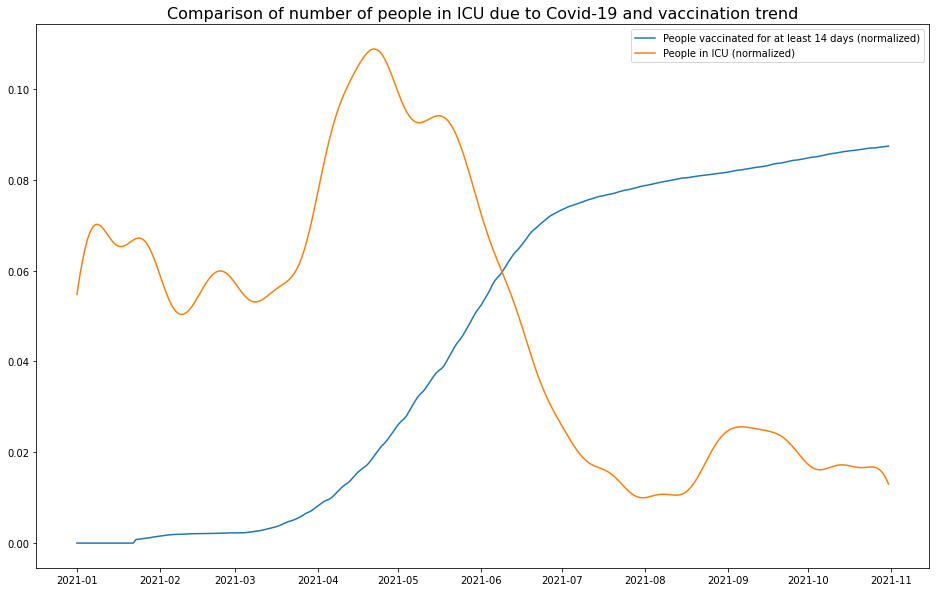

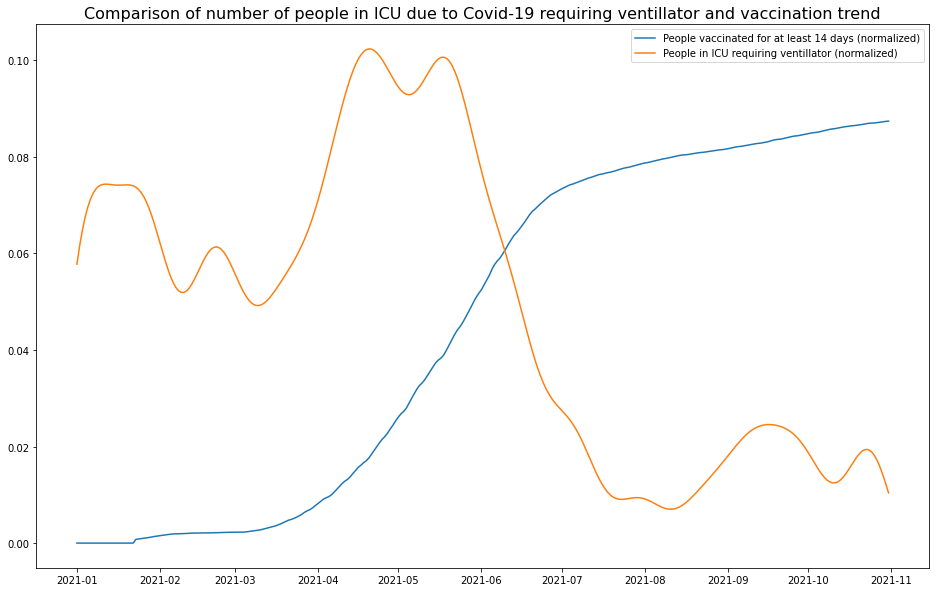

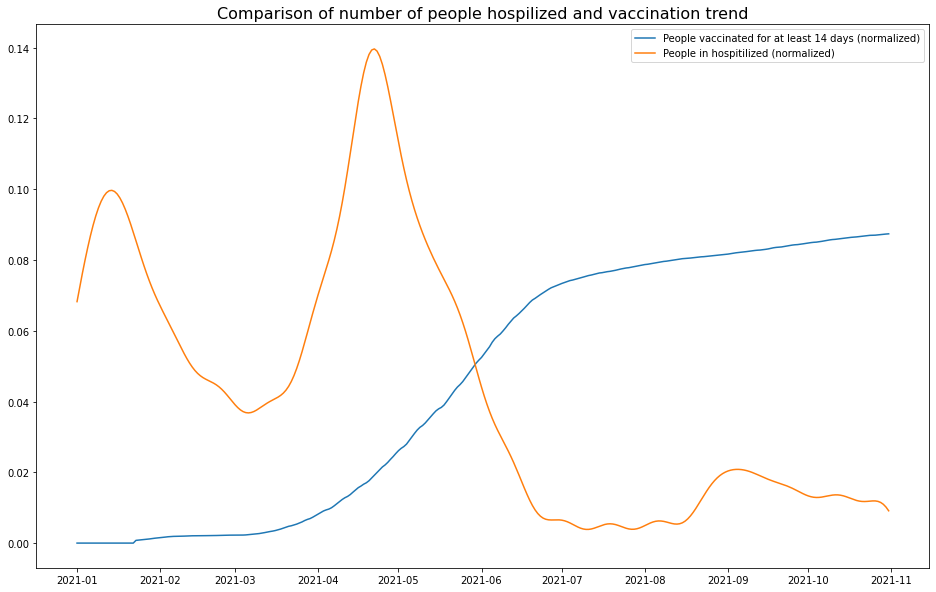

In [13]:
plt.figure()
plt.plot(plot_dates, normed_vacc, label = 'People vaccinated for at least 14 days (normalized)')
plt.plot(plot_dates, normed_cases , label = 'Positive Covid-19 cases (normalized)')
plt.legend()
plt.title('Comparison of positive covid cases and vaccination trend')
plt.show()

plt.figure()
plt.plot(plot_dates, normed_vacc, label = 'People vaccinated for at least 14 days (normalized)')
plt.plot(plot_dates, normed_icu , label = 'People in ICU (normalized)')
plt.legend()
plt.title('Comparison of number of people in ICU due to Covid-19 and vaccination trend')
plt.show()

plt.figure()
plt.plot(plot_dates, normed_vacc, label = 'People vaccinated for at least 14 days (normalized)')
plt.plot(plot_dates, normed_vent , label = 'People in ICU requiring ventillator (normalized)')
plt.legend()
plt.title('Comparison of number of people in ICU due to Covid-19 requiring ventillator and vaccination trend')
plt.show()

plt.figure()
plt.plot(plot_dates, normed_vacc, label = 'People vaccinated for at least 14 days (normalized)')
plt.plot(plot_dates, normed_hosp , label = 'People in hospitilized (normalized)')
plt.legend()
plt.title('Comparison of number of people hospilized and vaccination trend')
plt.show()